## Objective

### To build a predictive model for inventory forecasting so that service centre hold the right amount of stock without over or under-stocking .


Feature Details:

The database contains a RangeIndex: 28484 entries, 0 to 28483 Data columns (total 7 columns):

Invoice Date
Job Card Date
Business Partner Name
Vehicle No.
Vehicle Model
Current KM Reading
INVOICE LINE TEXT

In [1]:
# importing all the necessary packages



import pandas as pd
from pandas import datetime
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


<ipython-input-1-cfb79607269b>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:

#Using Connect method to connect to the database server by providing ip address of the host, user id and password.

mydb = mysql.connector.connect(
  host="18.136.157.135",
  user="dm_usdata_sql",
  password="37z<49REb&mKnl4AV!vJ"
)

mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)


('information_schema',)
('project_service_data',)


In [3]:
#connection to the database using the database name

mydb = mysql.connector.connect(
  host="18.136.157.135",
  user="dm_usdata_sql",
  password="37z<49REb&mKnl4AV!vJ",
  database="project_service_data"
)

cursor = mydb.cursor()

#displays all the tables in the database.

cursor.execute("show tables")
for x in cursor:
    print(x)

cursor.execute("SELECT * FROM service_data")
myresult = cursor.fetchall()

# displays the number of rows

print('The total number of rows =', cursor.rowcount)

for row in myresult:
    Invoice_Date= row[0]
    Job_Card_Date= row[1]
    Business_Partner_Name = row[2]
    Vehicle_No= row[3]
    Vehicle_Model = row[4]
    Current_KM_Reading =row[5]
    INVOICE_LINE_TEXT = row[6]
    print(Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT) 


('service_data',)
The total number of rows = 28482
30-05-17 30-05-17 shivXXXXXXXXXX KA03MFXXXX BAJAJ AVENGER STREET 220 50000 ENGINE OIL
02-06-17 31-05-17 KIRAXXXXXXXXXX KA53ESXXXX BAJAJ PULSAR NS 200 758 ENGINE OIL
02-06-17 31-05-17 KIRAXXXXXXXXXX KA53ESXXXX BAJAJ PULSAR NS 200 758 POLISH
02-06-17 31-05-17 KIRAXXXXXXXXXX KA53ESXXXX BAJAJ PULSAR NS 200 758 CONSUMABLES
02-06-17 31-05-17 KIRAXXXXXXXXXX KA53ESXXXX BAJAJ PULSAR NS 200 758 COOLANT OIL
02-06-17 31-05-17 KIRAXXXXXXXXXX KA53ESXXXX BAJAJ PULSAR NS 200 758 CHAIN LUBRICATION
02-06-17 31-05-17 KIRAXXXXXXXXXX KA53ESXXXX BAJAJ PULSAR NS 200 758 4 WAY SWITCH
31-05-17 31-05-17 pattXXXXXXXXXX KA53EMXXXX BAJAJ PLATINA 3717 ENGINE OIL
31-05-17 31-05-17 pattXXXXXXXXXX KA53EMXXXX BAJAJ PLATINA 3717 3M OIL
31-05-17 31-05-17 pattXXXXXXXXXX KA53EMXXXX BAJAJ PLATINA 3717 CHAIN LUBRICATION
31-05-17 31-05-17 diliXXXXXXXXXX KA53S3XXXX BAJAJ V 2800 GENERAL SERVICE
31-05-17 31-05-17 diliXXXXXXXXXX KA53S3XXXX BAJAJ V 2800 ENGINE OIL
31-05-17 31-05-1

In [4]:
type(myresult)

list

In [5]:
df = pd.DataFrame(myresult, columns =['Invoice_Date', 'Job_Card_Date', 'Business_Partner_Name','Vehicle_No','Vehicle_Model','Current_KM_Reading','INVOICE_LINE_TEXT'], dtype = float)
df

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL
...,...,...,...,...,...,...,...
28477,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,SPROCKET RUBBER
28478,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,CLUTCH CABLE
28479,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,OIL FILTER
28480,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,DISC OIL


In [6]:
df.dtypes

Invoice_Date              object
Job_Card_Date             object
Business_Partner_Name     object
Vehicle_No                object
Vehicle_Model             object
Current_KM_Reading       float64
INVOICE_LINE_TEXT         object
dtype: object

In [7]:
df['Job_Card_Date'] = pd.to_datetime(df['Job_Card_Date'])
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Invoice_Date           28482 non-null  datetime64[ns]
 1   Job_Card_Date          28482 non-null  datetime64[ns]
 2   Business_Partner_Name  28482 non-null  object        
 3   Vehicle_No             28482 non-null  object        
 4   Vehicle_Model          28482 non-null  object        
 5   Current_KM_Reading     28482 non-null  float64       
 6   INVOICE_LINE_TEXT      28476 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 1.5+ MB


# EDA analysis 

In [9]:
df.shape

(28482, 7)

In [10]:
df.INVOICE_LINE_TEXT.value_counts()

ENGINE OIL           3802
CHAIN LUBRICATION    3441
GENERAL SERVICE      2142
AIR FILTER           1715
3M OIL               1628
                     ... 
CAHIN PAD SCREW         1
6202 BEARING            1
DOOM CAP                1
WHEEL AXLE              1
POWER COIL              1
Name: INVOICE_LINE_TEXT, Length: 503, dtype: int64

In [11]:
df.INVOICE_LINE_TEXT.describe(include=['O'])

count          28476
unique           503
top       ENGINE OIL
freq            3802
Name: INVOICE_LINE_TEXT, dtype: object

In [12]:
df.Vehicle_Model.describe(include=['O'])

count                28482
unique                  28
top       BAJAJ PULSAR 150
freq                  8633
Name: Vehicle_Model, dtype: object

In [13]:
ENGINE_OIL = df.loc[df['INVOICE_LINE_TEXT'] == 'ENGINE OIL']

In [14]:
ENGINE_OIL['Job_Card_Date'].min(), ENGINE_OIL['Job_Card_Date'].max()

(Timestamp('2017-01-06 00:00:00'), Timestamp('2019-06-01 00:00:00'))

In [15]:
ENGINE_OIL

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-02-06,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
7,2017-05-31,2017-05-31,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,ENGINE OIL
11,2017-05-31,2017-05-31,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,2800.0,ENGINE OIL
13,2017-05-31,2017-05-31,diliXXXXXXXXXX,KA53S3XXXX,BAJAJ V,7854.0,ENGINE OIL
...,...,...,...,...,...,...,...
28443,2019-05-01,2019-05-01,ashoXXXXXXXXXX,KA53EPXXXX,BAJAJ PULSAR 150,22413.0,ENGINE OIL
28454,2019-06-01,2019-06-01,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448.0,ENGINE OIL
28464,2019-06-01,2019-06-01,PRITXXXXXXXXXX,KA53EWXXXX,BAJAJ PULSAR NS 160,2914.0,ENGINE OIL
28468,2019-06-01,2019-06-01,thyaXXXXXXXXXX,KA53EYXXXX,BAJAJ PULSAR 150,3425.0,ENGINE OIL


# Data Preprocessing

In [16]:
cols = ['Invoice_Date', 'Business_Partner_Name', 'Vehicle_No', 'Vehicle_Model', 'Current_KM_Reading']
ENGINE_OIL.drop(cols, axis=1, inplace=True)


In [17]:
ENGINE_OIL

,Job_Card_Date,INVOICE_LINE_TEXT
0,2017-05-30,ENGINE OIL
1,2017-05-31,ENGINE OIL
7,2017-05-31,ENGINE OIL
11,2017-05-31,ENGINE OIL
13,2017-05-31,ENGINE OIL
...,...,...
28443,2019-05-01,ENGINE OIL
28454,2019-06-01,ENGINE OIL
28464,2019-06-01,ENGINE OIL
28468,2019-06-01,ENGINE OIL


In [18]:
ENGINE_OIL= ENGINE_OIL.groupby(['Job_Card_Date','INVOICE_LINE_TEXT'],as_index=False).INVOICE_LINE_TEXT.count()
print(ENGINE_OIL)

    Job_Card_Date  INVOICE_LINE_TEXT
0      2017-01-06                  8
1      2017-01-07                 12
2      2017-01-08                  6
3      2017-01-09                  7
4      2017-01-10                  3
..            ...                ...
546    2019-02-01                  6
547    2019-03-01                  6
548    2019-04-01                 11
549    2019-05-01                 11
550    2019-06-01                  4

[551 rows x 2 columns]


In [19]:
ENGINE_OIL = ENGINE_OIL.sort_values('Job_Card_Date')
ENGINE_OIL.isnull().sum()

Job_Card_Date        0
INVOICE_LINE_TEXT    0
dtype: int64

In [20]:
# ENGINE_OIL = ENGINE_OIL.groupby('Job_Card_Date')['INVOICE_LINE_TEXT'].count().reset_index()

# Indexing with Time Series Data

In [21]:
ENGINE_OIL = ENGINE_OIL.set_index('Job_Card_Date')
ENGINE_OIL.index

DatetimeIndex(['2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09',
               '2017-01-10', '2017-01-11', '2017-01-12', '2017-02-06',
               '2017-02-08', '2017-02-09',
               ...
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', name='Job_Card_Date', length=551, freq=None)

In [22]:
ENGINE_OIL

,INVOICE_LINE_TEXT
Job_Card_Date,
2017-01-06,8
2017-01-07,12
2017-01-08,6
2017-01-09,7
2017-01-10,3
...,...
2019-02-01,6
2019-03-01,6
2019-04-01,11


In [23]:
# ENGINE_OIL['INVOICE_LINE_TEXT'] = pd.to_numeric(ENGINE_OIL['INVOICE_LINE_TEXT'])

In [24]:
ENGINE_OIL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 551 entries, 2017-01-06 to 2019-06-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   INVOICE_LINE_TEXT  551 non-null    int64
dtypes: int64(1)
memory usage: 8.6 KB


<AxesSubplot:xlabel='Job_Card_Date'>

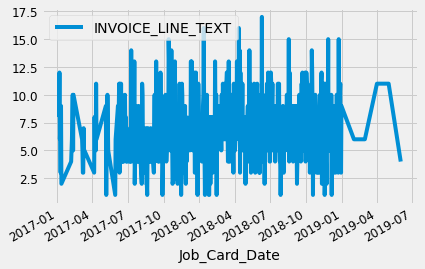

In [25]:
ENGINE_OIL.plot()

# stationary 

In [26]:
ENGINE_OIL.head()

,INVOICE_LINE_TEXT
Job_Card_Date,
2017-01-06,8
2017-01-07,12
2017-01-08,6
2017-01-09,7
2017-01-10,3


# ARIMA Model

## we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [27]:
y = ENGINE_OIL['INVOICE_LINE_TEXT'].resample('MS').mean()

# Have a quick peek 2017 Engine_oil sales data.

In [28]:
y

Job_Card_Date
2017-01-01     6.714286
2017-02-01     7.166667
2017-03-01     4.857143
2017-04-01     6.571429
2017-05-01     5.500000
2017-06-01     6.500000
2017-07-01     6.565217
2017-08-01     5.130435
2017-09-01     6.782609
2017-10-01     7.625000
2017-11-01     5.800000
2017-12-01     7.346154
2018-01-01     5.862069
2018-02-01     7.000000
2018-03-01     7.633333
2018-04-01     7.600000
2018-05-01     7.258065
2018-06-01     7.133333
2018-07-01     6.793103
2018-08-01     7.296296
2018-09-01     7.115385
2018-10-01     7.677419
2018-11-01     7.466667
2018-12-01     6.935484
2019-01-01          NaN
2019-02-01     6.000000
2019-03-01     6.000000
2019-04-01    11.000000
2019-05-01    11.000000
2019-06-01     4.000000
Freq: MS, Name: INVOICE_LINE_TEXT, dtype: float64

In [29]:
y.isnull()

Job_Card_Date
2017-01-01    False
2017-02-01    False
2017-03-01    False
2017-04-01    False
2017-05-01    False
2017-06-01    False
2017-07-01    False
2017-08-01    False
2017-09-01    False
2017-10-01    False
2017-11-01    False
2017-12-01    False
2018-01-01    False
2018-02-01    False
2018-03-01    False
2018-04-01    False
2018-05-01    False
2018-06-01    False
2018-07-01    False
2018-08-01    False
2018-09-01    False
2018-10-01    False
2018-11-01    False
2018-12-01    False
2019-01-01     True
2019-02-01    False
2019-03-01    False
2019-04-01    False
2019-05-01    False
2019-06-01    False
Freq: MS, Name: INVOICE_LINE_TEXT, dtype: bool

In [30]:
y.fillna(0, inplace = True)
y

Job_Card_Date
2017-01-01     6.714286
2017-02-01     7.166667
2017-03-01     4.857143
2017-04-01     6.571429
2017-05-01     5.500000
2017-06-01     6.500000
2017-07-01     6.565217
2017-08-01     5.130435
2017-09-01     6.782609
2017-10-01     7.625000
2017-11-01     5.800000
2017-12-01     7.346154
2018-01-01     5.862069
2018-02-01     7.000000
2018-03-01     7.633333
2018-04-01     7.600000
2018-05-01     7.258065
2018-06-01     7.133333
2018-07-01     6.793103
2018-08-01     7.296296
2018-09-01     7.115385
2018-10-01     7.677419
2018-11-01     7.466667
2018-12-01     6.935484
2019-01-01     0.000000
2019-02-01     6.000000
2019-03-01     6.000000
2019-04-01    11.000000
2019-05-01    11.000000
2019-06-01     4.000000
Freq: MS, Name: INVOICE_LINE_TEXT, dtype: float64

In [31]:
y['2017':]

Job_Card_Date
2017-01-01     6.714286
2017-02-01     7.166667
2017-03-01     4.857143
2017-04-01     6.571429
2017-05-01     5.500000
2017-06-01     6.500000
2017-07-01     6.565217
2017-08-01     5.130435
2017-09-01     6.782609
2017-10-01     7.625000
2017-11-01     5.800000
2017-12-01     7.346154
2018-01-01     5.862069
2018-02-01     7.000000
2018-03-01     7.633333
2018-04-01     7.600000
2018-05-01     7.258065
2018-06-01     7.133333
2018-07-01     6.793103
2018-08-01     7.296296
2018-09-01     7.115385
2018-10-01     7.677419
2018-11-01     7.466667
2018-12-01     6.935484
2019-01-01     0.000000
2019-02-01     6.000000
2019-03-01     6.000000
2019-04-01    11.000000
2019-05-01    11.000000
2019-06-01     4.000000
Freq: MS, Name: INVOICE_LINE_TEXT, dtype: float64

# Visualizing Engine oil Sales Time Series Data

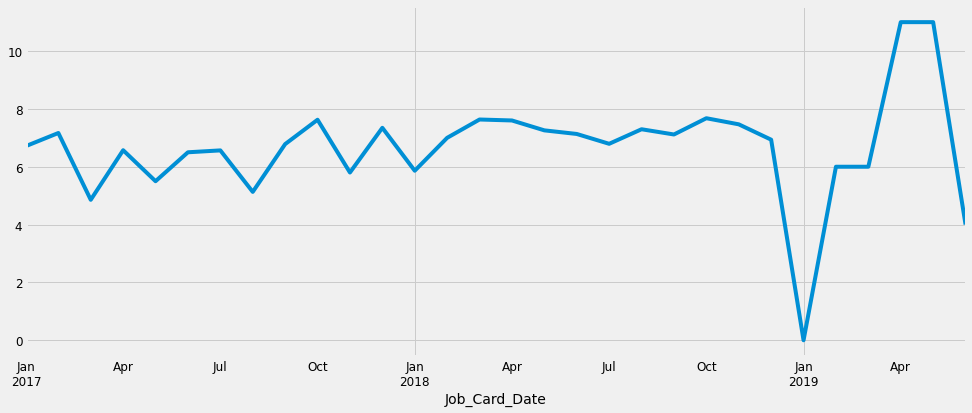

In [32]:
y.plot(figsize=(15, 6))
plt.show()

## visulatization of the data interms of trend , seasonality and noise usinf time- series decomposition.


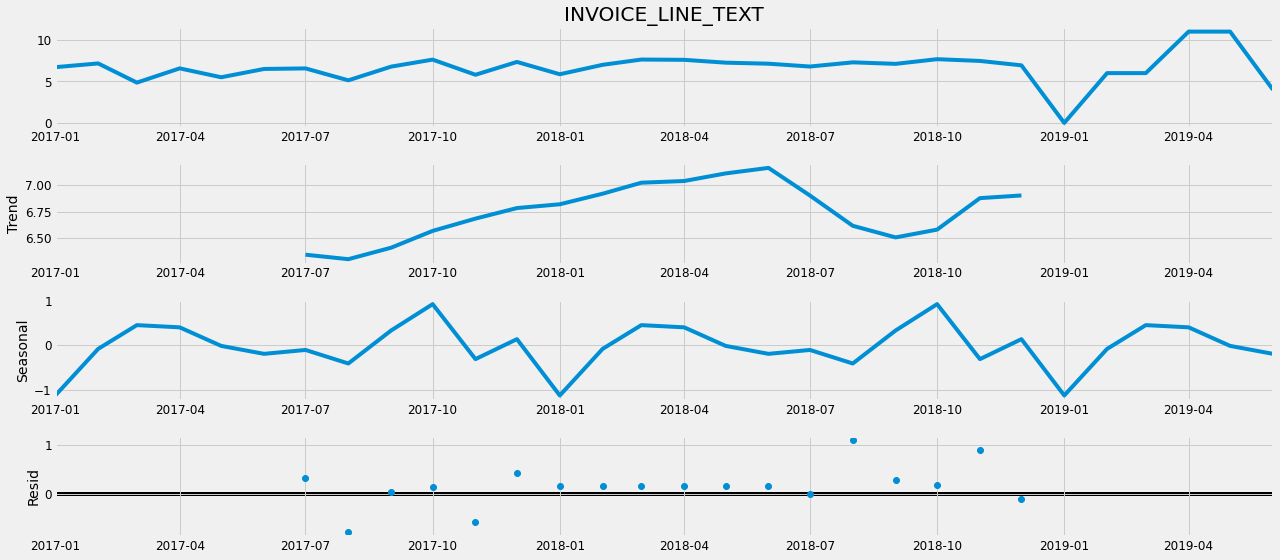

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [34]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [35]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:196.6791101960532
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:114.90511684037268
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:79.22447589867365
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:28.319465913778373
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:84.71728625444791
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:82.9486881320202
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:35.55554929189334
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:30.319462839434205
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:168.74904093485537
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:100.45279787142094
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:77.19456111561884
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:23.19925335353923
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:86.36484988521059
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:81.0483775193515
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:37.51276140971015
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:27.5732864293806
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:134.30171734317088
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:86.12266708969386
ARIMA(0

C:\Users\Deepak\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:22.71261251160449
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:83.57629477716122
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:80.81949402955486
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:28.429290255452514
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:25.009275626861587


### The above output suggests that ARIMA(0, 1, 1)x(0, 1, 1, 12)12  yields the lowest AIC value of 21.29496941521914. Therefore we should consider this to be optimal option.

# Fitting the ARIMA model

In [36]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9691      0.617     -1.570      0.116      -2.179       0.241
ma.S.L12       0.2043      1.068      0.191      0.848      -1.889       2.298
sigma2         5.3877      2.433      2.215      0.027       0.620      10.155


# Running the model diagnostics to investigate any unusual behavior.

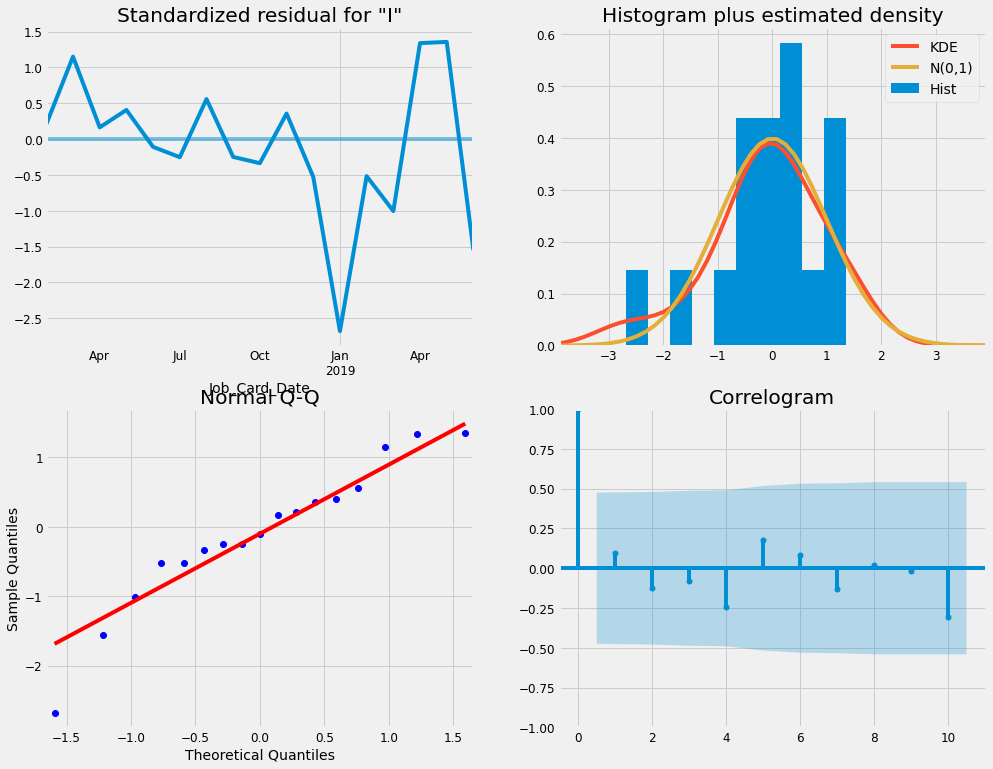

In [37]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

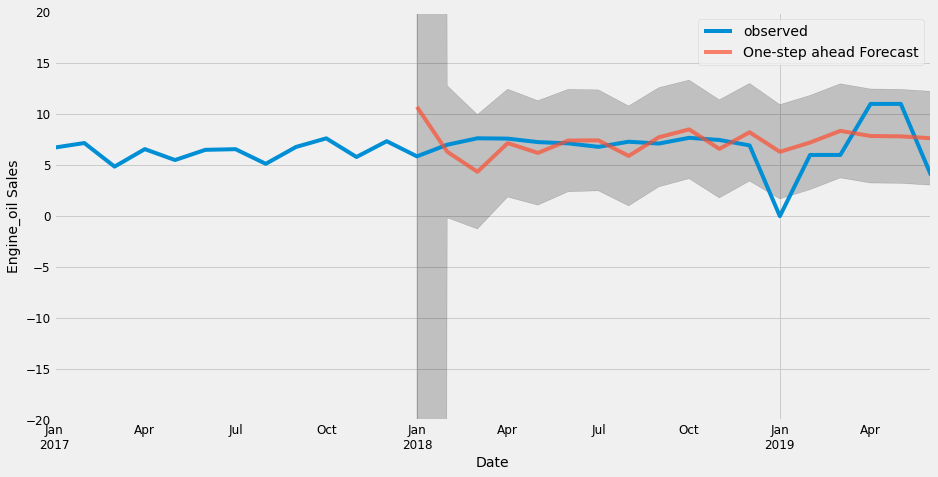

In [38]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Engine_oil Sales')
# plt.xlim([-20, 3])
plt.ylim([-20, 20])
plt.legend()
plt.show()

# The Mean Squared Error for the forecasts

In [39]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 6.78


# The Root Mean Squared Error 

In [40]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2.6


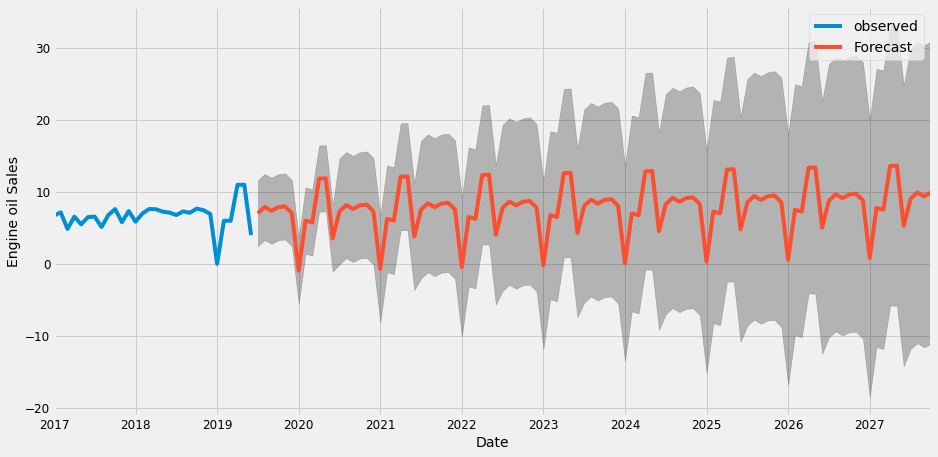

In [42]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Engine oil Sales')
plt.legend()
plt.show()